# Sensitivity one point following Perkins calculation 

In [3]:
import numpy as np
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [4]:
# Read of values for the graph 5.18
E_Perkin = [10**(11.35), 10**(11.75), 10**(11.9), 10**(12.2), 10**(12.4), 10**(12.6), 10**(12.9), 10**(13.2), 10**(13.45), 10**(13.95), 10**(15), 10**(15.85)]
Phi_Perkin = [10**(-5.45), 10**(-5.85), 10**(-6), 10**(-6.2), 10**(-6.3), 10**(-6.4), 10**(-6.35), 10**(-6.2), 10**(-6.1), 10**(-5.8), 10**(-5.1), 10**(-4.5)]

Phi_Perkin5 = [10**(-8.5), 10**(-8.7), 10**(-8.6), 10**(-8.5), 10**(-8.3), 10**(-8), 10**(-7.7), 10**(-7.4), 10**(-7.2), 10**(-6.8), 10**(-6.5), 10**(-6.2)]
E_Perkin5 = [10**(10.5), 10**(11), 10**(11.5), 10**(12), 10**(12.5), 10**(13), 10**(13.5), 10**(14), 10**(14.5), 10**(15), 10**(15.5), 10**(16)]

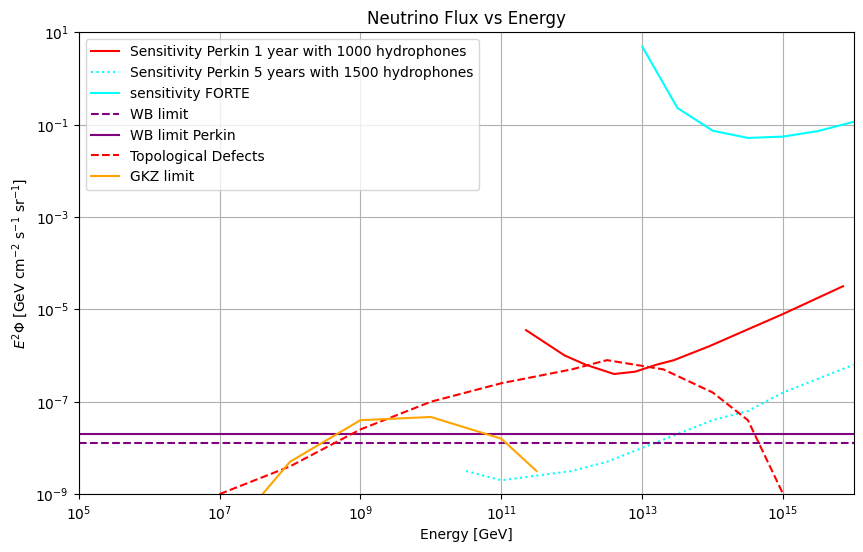

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Sensitivity Perkin 1 year with 1000 hydrophones")
plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Sensitivity Perkin 5 years with 1500 hydrophones")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
plt.ylim(10**(-9), 10**(1))
plt.legend()
plt.grid(True)
plt.show()

### Calculate the box volume and fraction that is needed:

In [16]:
# known paramters
Sup = 3
E_test2 = 10**(12.2)                                                                 # GeV
N_a = 6.022 * 10**(23)
rho = 1                                                                              # g cm^-3
T = 365*24*3600                                                                      # s
molar_mass = 18.01528                                                                # g mol^-1
mol_constant = 1 / molar_mass                                                        # mol g^-1

# the range:
Energy = [10**(9), 10**(10), 10**(11), 10**(12)]
cross_section = [10**(-31.95), 10**(-31.8), 10**(-31.2), 10**(-30.95)]                                                                    # cm^2

# assume all the events that come into the box are accurately reconstructed
fraction = 1

# unknown box volume
radius_km = [1, 10, 20, 30, 40, 50]
Vbox_km = [(i)**2 * 4 * np.pi for i in radius_km]                                    # km^3
Vbox_i = [i * 10**(15) for i in Vbox_km]                                             # cm^3

# loop through the energies
Phis = [] 

for i in range(0, len(Energy)):
    E = Energy[i]
    cross = cross_section[i]
    lam = cross * rho * N_a * Vbox_i[3] * 2 * np.pi * T * fraction * mol_constant    # cm^2 s
    phi = Sup / (E * lam)                                                            # GeV^-1 cm^-2 s^-1
    phi_E2 = E**2 * phi                                                              # GeV^1 cm^-2 s^-1
    Phis.append(phi_E2)
             
             
print(Phis)

[3.569296871003787e-09, 2.5268686730426334e-08, 6.347207134022387e-08, 3.5692968710037873e-07]


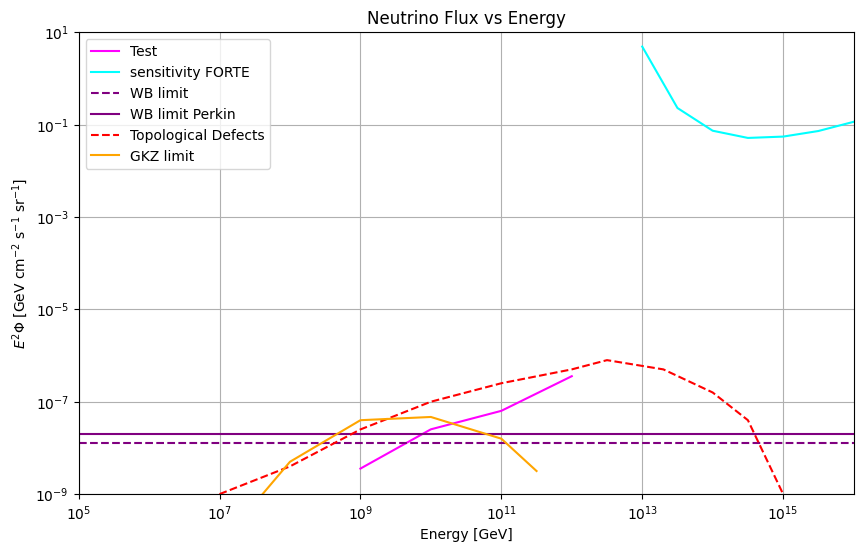

In [17]:
# Plotting
plt.figure(figsize=(10, 6))

plt.loglog(Energy, Phis, color="magenta", label="Test")

#plt.loglog(E_Perkin, Phi_Perkin, color="red", label="Sensitivity Perkin 1 year with 1000 hydrophones")
#plt.loglog(E_Perkin5, Phi_Perkin5, color="cyan", linestyle='dotted', label="Sensitivity Perkin 5 years with 1500 hydrophones")

################################################################################################################################
# add the sensitivity of FORTE
lambda_E = [8.0E12, 5.4E14, 5.3E15, 2.4E16, 7.1E16, 1.7E17, 3.4E17, 6.0E17, 9.5E17]
log = [13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0]
E = [10**(i) for i in log]
s_up = 3.89
flux_E = [s_up / (x * y) for x, y in zip(E, lambda_E)]
flux_E_E2 = [x**2 * y for x, y in zip(E, flux_E)]
plt.plot(E, flux_E_E2, label='sensitivity FORTE', color='cyan')

################################################################################################################################
# add the WB limit
plt.axhline(10**(-7.9), label="WB limit", color="purple", linestyle='dashed')
plt.axhline(10**(-7.7), label="WB limit Perkin", color="purple")

################################################################################################################################
# add the topological defects
Top_E = [10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(12), 10**(12.5), 10**(13.3), 10**(14), 10**(14.5), 10**(15)]
Top_flux_E = [10**(-9), 10**(-8.4), 10**(-7.6), 10**(-7), 10**(-6.6), 10**(-6.3), 10**(-6.1), 10**(-6.3), 10**(-6.8), 10**(-7.4), 10**(-9)]
plt.loglog(Top_E, Top_flux_E, label='Topological Defects', linestyle='dashed', color='red')

################################################################################################################################
# add the GKZ neutrinos from source 3.
GKZ_E = [10**(4), 10**(5), 10**(6), 10**(7), 10**(8), 10**(9), 10**(10), 10**(11), 10**(11.5)]
GKZ_flux_E = [10**(-20), 10**(-19.08), 10**(-18.1), 10**(-17.1), 10**(-16.3), 10**(-16.4), 10**(-17.33), 10**(-18.8), 10**(-20)]
GKZ_flux_E2 = [i * j for i,j in zip(GKZ_E, GKZ_flux_E)]
plt.loglog(GKZ_E, GKZ_flux_E2, label='GKZ limit', color='orange')

################################################################################################################################

plt.title('Neutrino Flux vs Energy')
plt.xlabel('Energy [GeV]')
plt.ylabel('$E^2\Phi$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]')
plt.xlim(10**(5), 10**(16))
plt.ylim(10**(-9), 10**(1))
plt.legend()
plt.grid(True)
plt.show()